In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector
import seaborn as sns
from dotenv import load_dotenv
import os

In [90]:
load_dotenv()

True

In [91]:
# Establish a connection
try:
    conn = mysql.connector.connect(
    host= 'localhost',
    user=os.getenv('db_user'),
    password= os.getenv('db_pass')
    )
    print('Connection established')
except mysql.connector.Error as e:
    print(f'Error: {e}')

Connection established


In [92]:
# Create a cursor
cursor = conn.cursor(buffered=True)

In [93]:
# Use database
cursor.execute('''use indiancensus''')

In [94]:
cursor.execute('show tables')
tables = cursor.fetchall()
for table in tables:
    print(table)

('data1',)
('data2',)


## Question 1: Print the data from 'data1' table.

In [95]:
cursor.execute('select * from data1')
data1 = cursor.fetchall()

for row in data1:
    print('District:', row[0])
    print('State:', row[1])
    print('Growth %:', row[2])
    print('Sex_Ratio:', row[3])
    print('Literacy:', row[4])
    print('-'*30)

District: Thane
State: Maharashtra
Growth %: 36.01
Sex_Ratio: 886
Literacy: 84.53
------------------------------
District: North Twenty Four Parganas
State: West Bengal
Growth %: 12.04
Sex_Ratio: 955
Literacy: 84.06
------------------------------
District: Bangalore
State: Karnataka
Growth %: 47.18
Sex_Ratio: 916
Literacy: 87.67
------------------------------
District: Pune
State: Maharashtra
Growth %: 30.37
Sex_Ratio: 915
Literacy: 86.15
------------------------------
District: Mumbai Suburban
State: Maharashtra
Growth %: 8.29
Sex_Ratio: 860
Literacy: 89.91
------------------------------
District: South Twenty Four Parganas
State: West Bengal
Growth %: 18.17
Sex_Ratio: 956
Literacy: 77.51
------------------------------
District: Barddhaman
State: West Bengal
Growth %: 11.92
Sex_Ratio: 945
Literacy: 76.21
------------------------------
District: Ahmadabad
State: Gujarat
Growth %: 24.03
Sex_Ratio: 904
Literacy: 85.31
------------------------------
District: Murshidabad
State: West Benga

## Question 2: Print the data from 'data2' table.

In [96]:
cursor.execute('Select * from data2')
data2 = cursor.fetchall()

for row in data2:
    print('District:', row[0])
    print('State:', row[1])
    print('Area (km2):', row[2])
    print('Population:', row[3])
    print('-'*30)

District: Adilabad
State: Andhra Pradesh
Area (km2): 16105
Population: 2741239
------------------------------
District: Agra
State: Uttar Pradesh
Area (km2): 4041
Population: 4418797
------------------------------
District: Ahmadabad
State: Gujarat
Area (km2): 8107
Population: 7214225
------------------------------
District: Ahmadnagar
State: Maharashtra
Area (km2): 17048
Population: 4543159
------------------------------
District: Aizawl
State: Mizoram
Area (km2): 3576
Population: 400309
------------------------------
District: Ajmer
State: Rajasthan
Area (km2): 8481
Population: 2583052
------------------------------
District: Akola
State: Maharashtra
Area (km2): 5676
Population: 1813906
------------------------------
District: Alappuzha
State: Kerala
Area (km2): 1415
Population: 2127789
------------------------------
District: Aligarh
State: Uttar Pradesh
Area (km2): 3650
Population: 3673889
------------------------------
District: Alirajpur
State: Madhya Pradesh
Area (km2): 3182
Pop

## Question 3: Calculate the Average Growth by each State.

In [97]:
cursor.execute('SELECT State, ROUND(AVG(Growth)*100,2) AS Avg_Growth FROM data1 GROUP BY state')
avg_growth_state = cursor.fetchall()

avg_growth_state_df = pd.DataFrame(avg_growth_state, columns=['State', 'Avg Growth Rate']).sort_values(by='Avg Growth Rate', ascending=False)
avg_growth_state_df.head()

,State,Avg Growth Rate
28,Nagaland,8228.09
29,Dadra and Nagar Haveli,5588.00
32,Daman and Diu,4274.00
23,Puducherry,3429.75
24,Meghalaya,3039.43


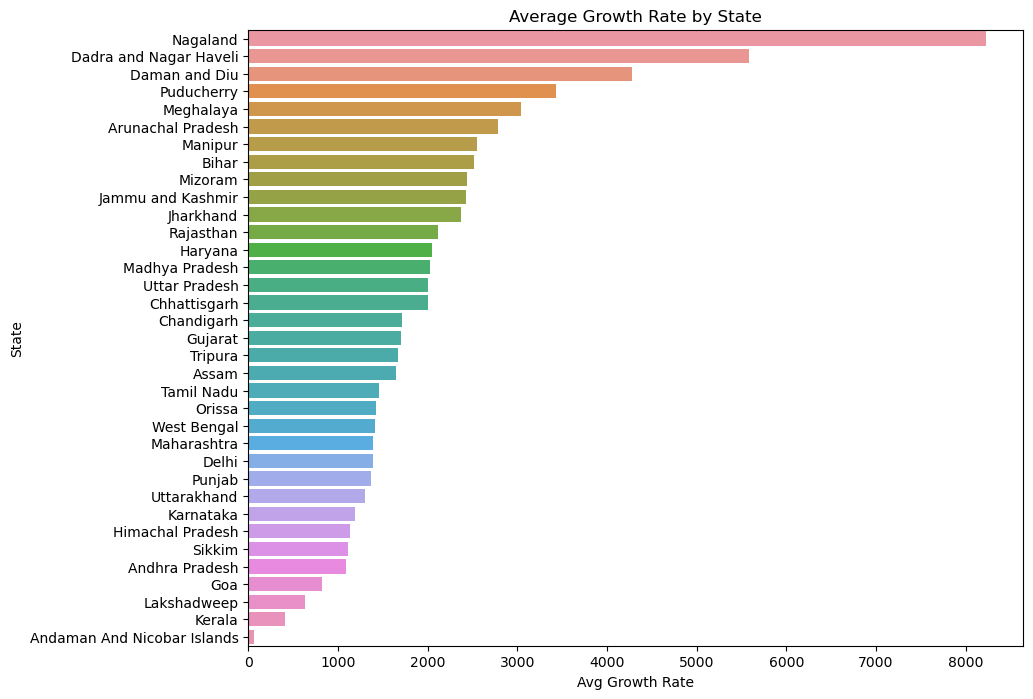

In [117]:
plt.figure(figsize=(10, 8))
sns.barplot(avg_growth_state_df, y='State', x='Avg Growth Rate')
plt.title('Average Growth Rate by State')
plt.show()

## Question 4: Calculate the Average Sex Ratio by each State.

In [99]:
cursor.execute('SELECT State, ROUND(AVG(Sex_Ratio),2) AS Avg_Sex_Ratio FROM data1 GROUP BY state')
avg_sexratio_state = cursor.fetchall()

avg_sexratio_state_df = pd.DataFrame(avg_sexratio_state, columns=['State', 'Avg Sex Ratio']).sort_values(by='Avg Sex Ratio', ascending=False)
avg_sexratio_state_df.head()

,State,Avg Sex Ratio
9,Kerala,1080.43
23,Puducherry,1074.50
17,Uttarakhand,1010.46
8,Tamil Nadu,999.38
7,Andhra Pradesh,994.87


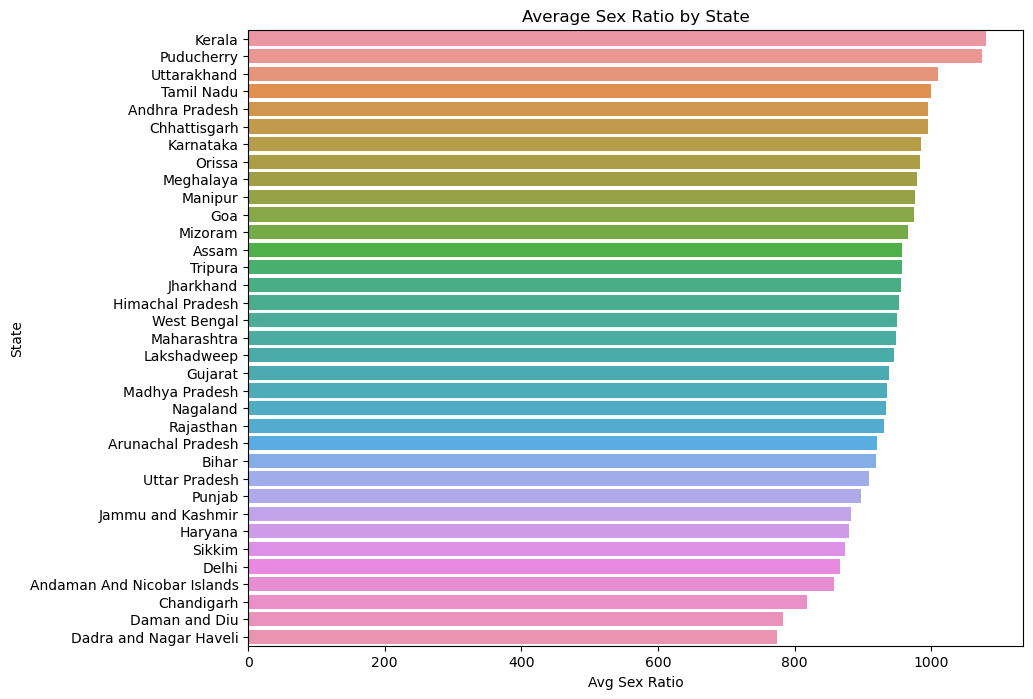

In [118]:
plt.figure(figsize=(10,8))
sns.barplot(data=avg_sexratio_state_df, x='Avg Sex Ratio', y='State')
plt.title('Average Sex Ratio by State')
plt.show()

## Question 5: Calculate the Average Literacy by each State and sort it from highest to lowest.

In [101]:
cursor.execute('SELECT State, ROUND(AVG(Literacy),2) AS Avg_Literacy FROM data1 GROUP BY State ORDER BY Avg_Literacy DESC')
avg_literacy_state = cursor.fetchall()

avg_literacy_state_df = pd.DataFrame(avg_literacy_state, columns=['State', 'Avg Literacy Rate'])
avg_literacy_state_df.head()

,State,Avg Literacy Rate
0,Kerala,93.70
1,Lakshadweep,91.85
2,Mizoram,89.36
3,Goa,88.58
4,Puducherry,87.46


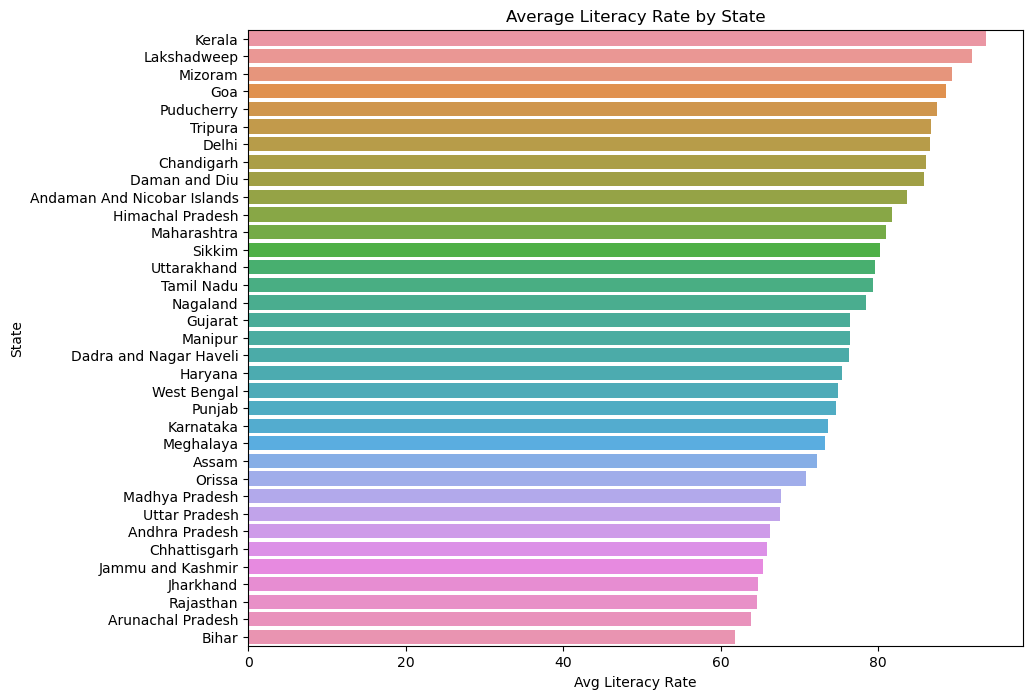

In [119]:
plt.figure(figsize=(10,8))
sns.barplot(data=avg_literacy_state_df, x='Avg Literacy Rate', y='State')
plt.title('Average Literacy Rate by State')
plt.show()

## Question 6: Show the top 5 Districts in Literacy Rate.

In [103]:
cursor.execute('SELECT State, District, Literacy FROM data1 ORDER BY Literacy DESC LIMIT 5')
top5_literacy_state = cursor.fetchall()

top5_literacy_state_df = pd.DataFrame(top5_literacy_state, columns=['State', 'District', 'Literacy'])
top5_literacy_state_df

,State,District,Literacy
0,Mizoram,Serchhip,97.91
1,Mizoram,Aizawl,97.89
2,Puducherry,Mahe,97.87
3,Kerala,Kottayam,97.21
4,Kerala,Pathanamthitta,96.55


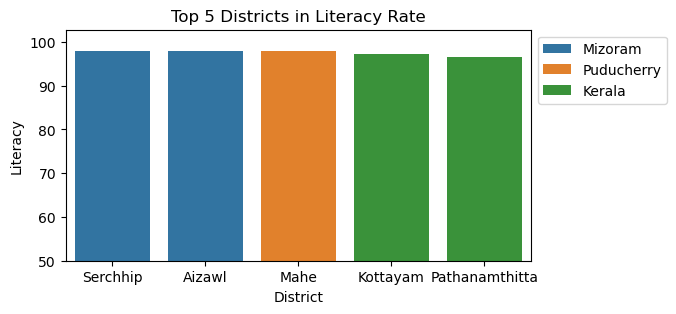

In [104]:
plt.figure(figsize=(6,3))
sns.barplot(data=top5_literacy_state_df, y='Literacy', x='District', hue='State', dodge=False)
plt.title('Top 5 Districts in Literacy Rate')
plt.ylim(50)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Question 7: Retrieve the data for Jharkhand and Bihar.

In [105]:
cursor.execute('''SELECT * FROM data1 WHERE STATE IN ('Jharkhand', 'Bihar')''')
jha_bih_data = cursor.fetchall()

jha_bih_data_df = pd.DataFrame(jha_bih_data, columns=['District', 'State', 'Growth %', 'Sex_Ratio', 'Literacy'])
jha_bih_data_df

,District,State,Growth %,Sex_Ratio,Literacy
0,Patna,Bihar,23.73,897,70.68
1,Purbi Champaran,Bihar,29.43,902,55.79
2,Muzaffarpur,Bihar,28.14,900,63.43
3,Madhubani,Bihar,25.51,926,58.62
4,Gaya,Bihar,26.43,937,63.67
...,...,...,...,...,...
57,Sheohar,Bihar,27.19,893,53.78
58,Sheikhpura,Bihar,21.09,930,63.86
59,Simdega,Jharkhand,16.58,997,67.99
60,Khunti,Jharkhand,22.32,997,63.86


## Question 8: Retrieve the Male and Female Population by each State.

In [ ]:
"""Formulas to find Male and Female Ratio:
Population = Males + Females ----------(equation 1)
	Males = Population - Females
    Females = Population - Males
    
Sex Ratio = Females/Males ----------(equation 2)
	Females = Sex Ratio * Males
    Population - Males = Sex Ratio * Males
    Population = (Sex Ratio * Males) + Males
    Population = Males(Sex Ratio + 1)
    Males = Population/(Sex Ratio + 1) ----------(equation 3)
    
    Females = Population - Population/(Sex Ratio + 1)
    Females = Population(1-1/(Sex Ratio + 1))
    Females = Population((Sex Ratio + 1 -1)/ Sex Ratio + 1)
    Females = (Population * Sex Ratio)/(Sex Ratio + 1) --------(equation 4)"""

In [107]:
cursor.execute('''SELECT State, SUM(Population) AS 'Total Population', ROUND(SUM(Population/(Sex_Ratio + 1))) AS 'Total Males', ROUND(SUM((Population * Sex_Ratio)/(Sex_Ratio + 1))) AS 'Total Females'
 FROM 
	(SELECT a.District, a.State, a.Sex_Ratio/1000 AS Sex_Ratio, b.Population
	FROM data1 a
	INNER JOIN data2 b ON a.District = b.District) c
GROUP BY State''')
    
    
male_female_count = cursor.fetchall()

male_female_count_df = pd.DataFrame(male_female_count, columns=['State','Total Population', 'Male Population', 'Female Population'])
male_female_count_df

,State,Total Population,Male Population,Female Population
0,Maharashtra,113322979,58641584,54681395
1,West Bengal,91276115,46810398,44465717
2,Karnataka,61350527,31095287,30255240
3,Gujarat,58312606,30423411,27889195
4,Rajasthan,71757578,37170091,34587487
5,Uttar Pradesh,196779476,102901423,93878053
6,Bihar,102701363,53518385,49182978
7,Andhra Pradesh,84580777,42439617,42141160
8,Tamil Nadu,72147030,36139418,36007612
9,Kerala,33406061,16027488,17378573


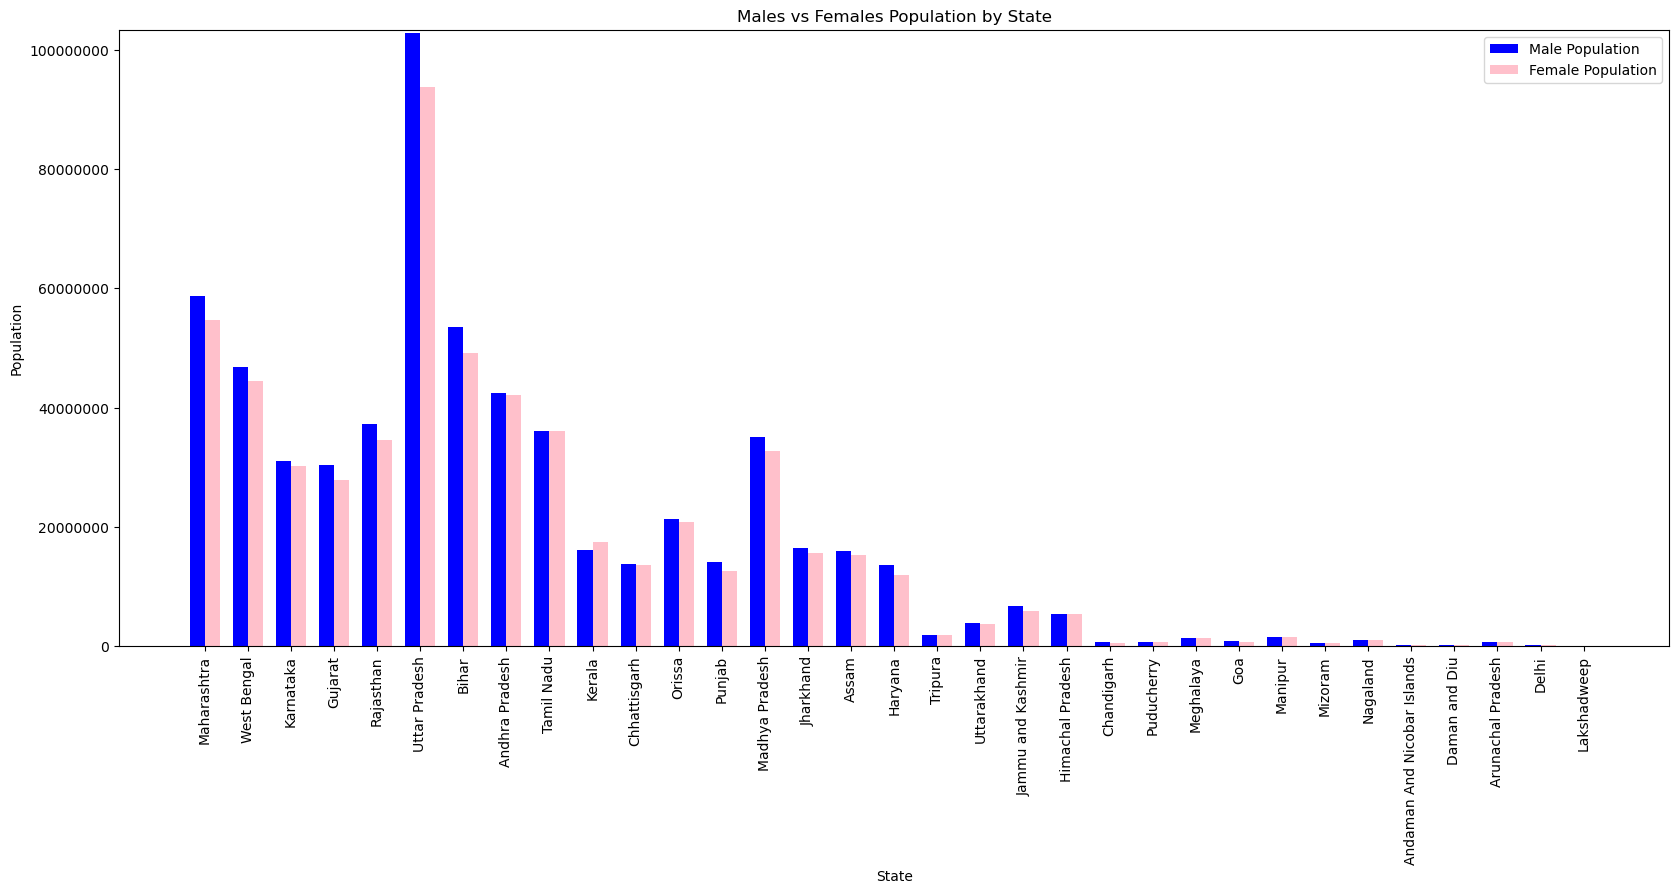

In [108]:
plt.figure(figsize=(20, 8))

# Calculate the width of each bar
bar_width = 0.35

# Create an array of x positions for the bars
x = np.arange(len(male_female_count_df['State']))

# Use the 'x' positions to adjust the position of bars for Male and Female populations
plt.bar(x - bar_width/2, male_female_count_df['Male Population'], width=bar_width, color='blue', label='Male Population')
plt.bar(x + bar_width/2, male_female_count_df['Female Population'], width=bar_width, color='pink', label='Female Population')

plt.xlabel('State')
plt.ylabel('Population')
plt.title('Males vs Females Population by State')
plt.xticks(x, male_female_count_df['State'], rotation=90)
plt.ylim(0, max(male_female_count_df['Male Population'].max(), male_female_count_df['Female Population'].max()) + 500000)
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

## Question 9: Caluclate the Total Literate and Illiterate people.

In [ ]:
"""Literaccy Ratio = Total Literate People/Population -------------(equation 1)
		Total Literate People = Literacy Ratio * Population ----------(equation 2)
        Total Illiterate People = (1-Literacy Rato) * Population --------(equation 3)"""

In [110]:
cursor.execute('''SELECT State, ROUND(SUM(Literacy_Ratio*Population),2) AS 'Total Literate People', ROUND(SUM((1-Literacy_Ratio)*Population),2) AS 'Total Illiterate People'
FROM
	(SELECT a.District, a.State, a.Literacy/100 AS Literacy_Ratio, b.Population
	FROM data1 a
	INNER JOIN data2 b ON a.District = b.District) c
GROUP BY State''')
literate_illiterate = cursor.fetchall()

literate_illiterate_df = pd.DataFrame(literate_illiterate, columns= ['State', 'Total Literate People', 'Total Illiterate People'])
literate_illiterate_df.head()

,State,Total Literate People,Total Illiterate People
0,Maharashtra,92954046.94,20368932.06
1,West Bengal,69475387.98,21800727.02
2,Karnataka,46146322.61,15204204.39
3,Gujarat,45836336.78,12476269.22
4,Rajasthan,47063500.64,24694077.36


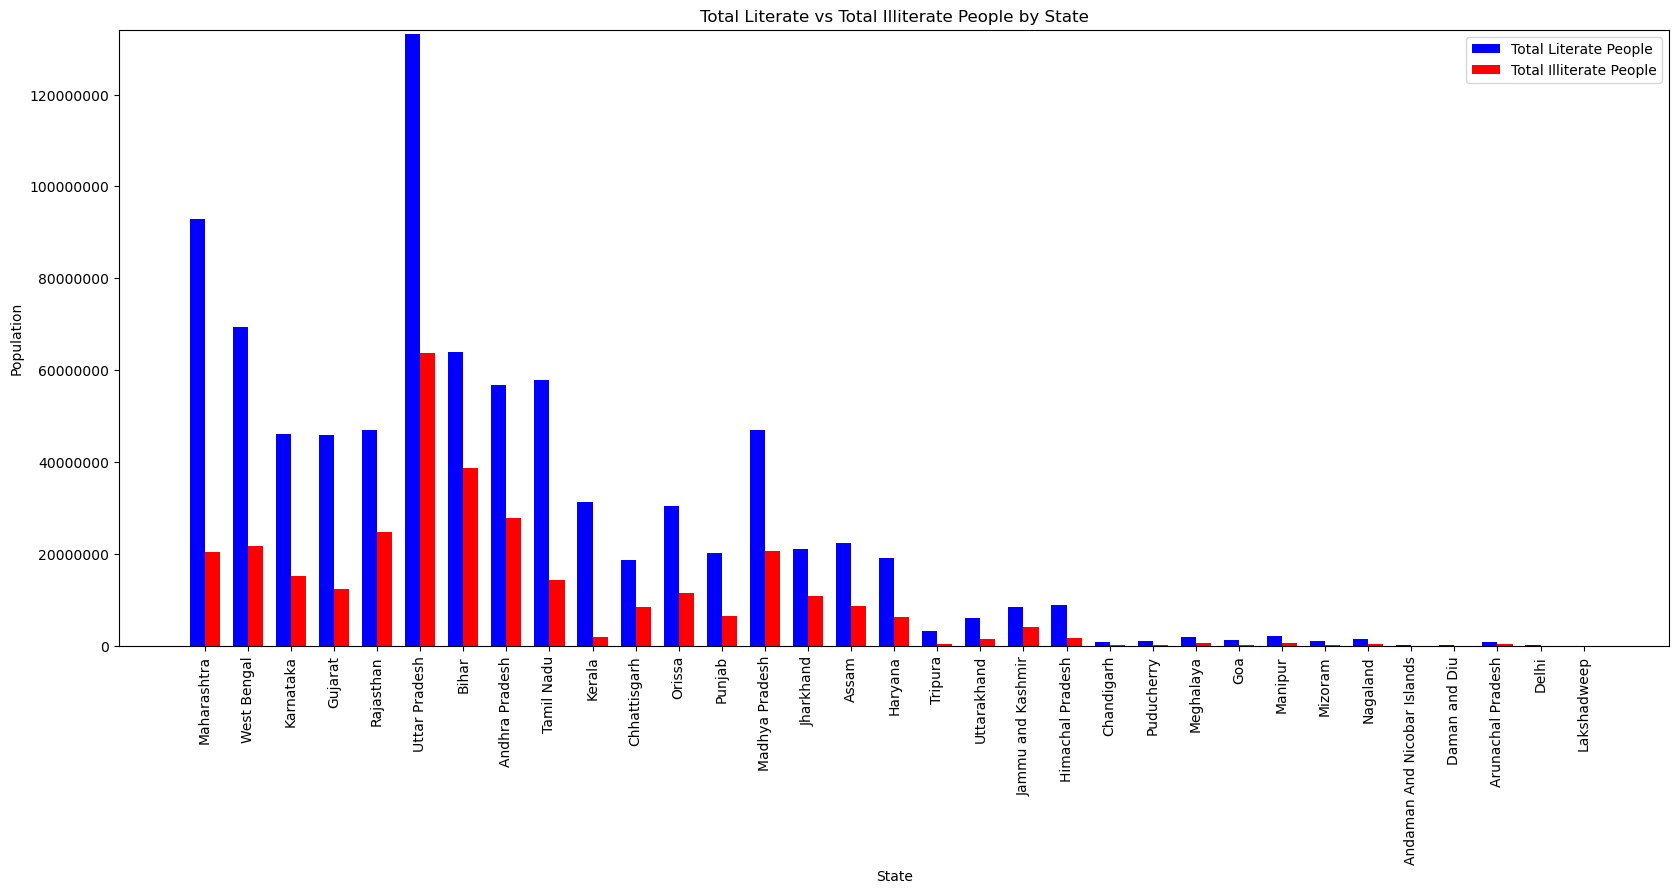

In [111]:
plt.figure(figsize=(20,8))

# Calculate the width of each bar
bar_width = 0.35

# Create an array of x positions for the bars
x = np.arange(len(literate_illiterate_df['State']))

# Use the 'x' positions to adjust the position of bars for Total Literate and Total Illiterate People
plt.bar(x - bar_width/2, literate_illiterate_df['Total Literate People'], width=bar_width, color='blue', label='Total Literate People')
plt.bar(x + bar_width/2, literate_illiterate_df['Total Illiterate People'], width=bar_width, color='red', label='Total Illiterate People')

plt.xlabel('State')
plt.ylabel('Population')
plt.title('Total Literate vs Total Illiterate People by State')
plt.xticks(x, literate_illiterate_df['State'], rotation=90)
plt.ylim(0, max(literate_illiterate_df['Total Literate People'].max(),literate_illiterate_df['Total Illiterate People'].max()) + 1000000)
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

## Question 10: Calculate the Previous Census Population.

In [ ]:
"""Population = Previous Census Population + (Growth * Previous Census Population) ---------(equation 1)
   Population = Previous Census Population (1 + Growth)
   Previous Census Population = Population/(1 + Growth) ----------(equation 2)"""

In [113]:
cursor.execute('''SELECT  SUM(Previous_Census_Population) AS Previous_Census_Population, SUM(Current_Census_Population) AS Current_Census_Population FROM
	(SELECT State, ROUND(SUM(Population/(1+Growth)),2) AS Previous_Census_Population, SUM(Population) AS Current_Census_Population
	FROM
		(SELECT a.District, a.State, a.Growth/100 AS Growth, b.Population
		FROM data1 a
		INNER JOIN data2 b ON a.District = b.District) c
	GROUP BY State) d''')
prv_census_population = cursor.fetchall()

prv_census_population_df = pd.DataFrame(prv_census_population, columns=['Previous Census Population', 'Current Census Population'])
prv_census_population_df

,Previous Census Population,Current Census Population
0,1007610291.35,1186354496


## Question 11: Calculate the Area_km2 vs Population.

In [114]:
cursor.execute('''SELECT g.Total_Area/g.Previous_Census_Population AS Previous_Area, g.Total_Area/g.Current_Census_Population AS Current_Area
FROM 
(SELECT q.*, k.Total_Area
FROM
(SELECT '1' AS Keyy, n.*
FROM
	(SELECT SUM(Previous_Census_Population) AS Previous_Census_Population, SUM(Current_Census_Population) AS Current_Census_Population
	FROM
		(SELECT State, ROUND(SUM(Population/(1+Growth)),2) AS Previous_Census_Population, SUM(Population) AS Current_Census_Population
		FROM
			(SELECT a.State, a.District, a.Growth/100 as Growth, b.Population
			FROM data1 a
			INNER JOIN data2 b ON a.District = b.District) c
		GROUP BY State) d) n) q
INNER JOIN 
(SELECT '1' AS Keyy, r.*
FROM (SELECT SUM(Area_km2) AS Total_Area from data2) r) k ON q.Keyy = k.Keyy) g''')

area_vs_population = cursor.fetchall()

area_vs_population_df = pd.DataFrame(area_vs_population, columns=['Previous Area', 'Current Area'])
area_vs_population_df

,Previous Area,Current Area
0,0.0031,0.0027


## Question 12: Retrieve Top 3 States with the highest literacy rate using window function.

In [115]:
cursor.execute('''SELECT a.* FROM
(SELECT State, District, Literacy, RANK() OVER(PARTITION BY State ORDER BY Literacy DESC) AS Rnk
FROM data1) a
WHERE a.rnk IN (1,2,3)
ORDER BY State''')
top3_literacy_window = cursor.fetchall()

top3_literacy_window_df = pd.DataFrame(top3_literacy_window, columns=['State', 'District', 'Literacy', 'Rank'])
top3_literacy_window_df

,State,District,Literacy,Rank
0,Andaman And Nicobar Islands,South Andaman,89.13,1
1,Andaman And Nicobar Islands,North And Middle Andaman,83.91,2
2,Andaman And Nicobar Islands,Nicobars,78.06,3
3,Andhra Pradesh,Hyderabad,83.25,1
4,Andhra Pradesh,Rangareddy,75.87,2
...,...,...,...,...
92,Uttarakhand,Nainital,83.88,2
93,Uttarakhand,Chamoli,82.65,3
94,West Bengal,Purba Medinipur,87.02,1
95,West Bengal,Kolkata,86.31,2
